In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import parallel_coordinates
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("nyc_taxi_trip_duration.csv")

In [5]:
data.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
data.shape

(729322, 11)

In [7]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [8]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
data.select_dtypes(exclude=['int64', 'float64', 'Int64']).dtypes

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

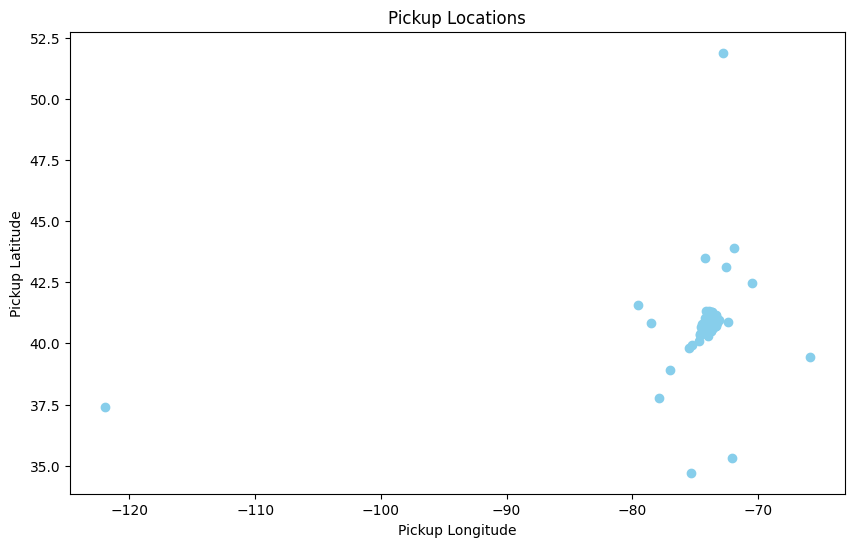

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data["pickup_longitude"], data["pickup_latitude"], color='skyblue')
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.title("Pickup Locations")
plt.show()

##### Here we see that most taxi location are at the pickup location where longitude us between -80 and -70 and latudtude is between 42.5 and 40

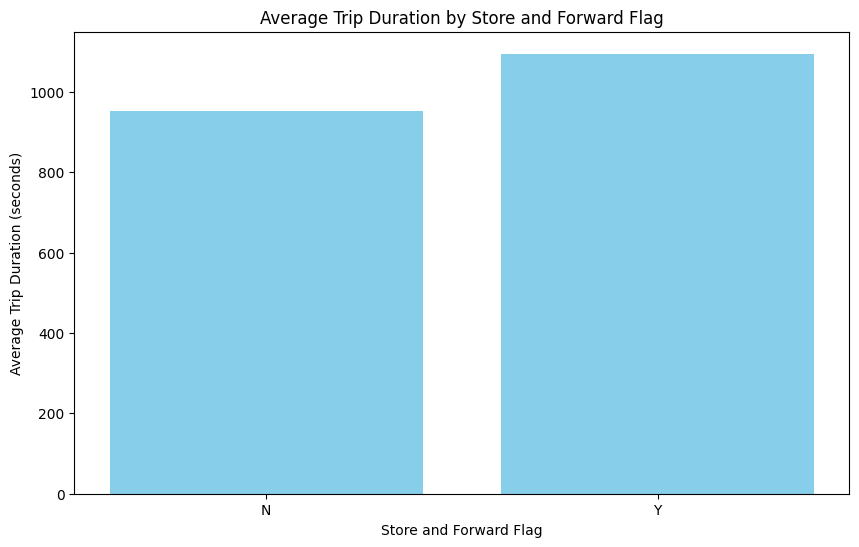

In [11]:
average_trip_duration = data.groupby("store_and_fwd_flag")["trip_duration"].mean()
plt.figure(figsize=(10, 6))
plt.bar(average_trip_duration.index, average_trip_duration.values, color='skyblue')
plt.xlabel("Store and Forward Flag")
plt.ylabel("Average Trip Duration (seconds)")
plt.title("Average Trip Duration by Store and Forward Flag")
plt.show()

#### Here we see that the average trip duration for "store and forward"(Y) is more than not a store and forward trip (N)

In [12]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [13]:
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [15]:
# Turining datatypes to dataframes for analaysis
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag.values == 'Y')
data['total_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds())






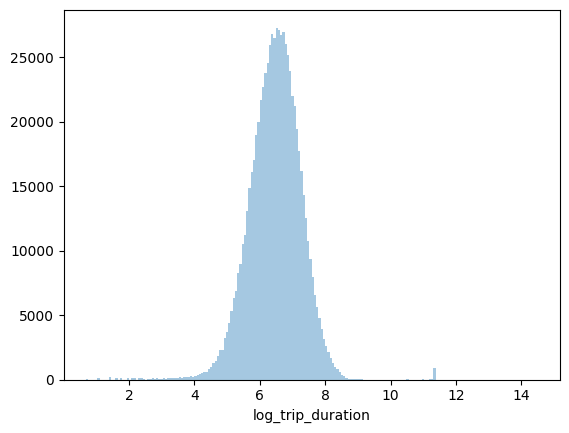

In [16]:
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
sns.distplot(data['log_trip_duration'], kde = False, bins = 200)
plt.show()

#### In this graph we see a bell curve like distribution where trip duration is mostly around 6.5 mins however we see there are outliers at 11 mins and trip durations less than 2 mins showing the outliers that need to be considered in our analaysis

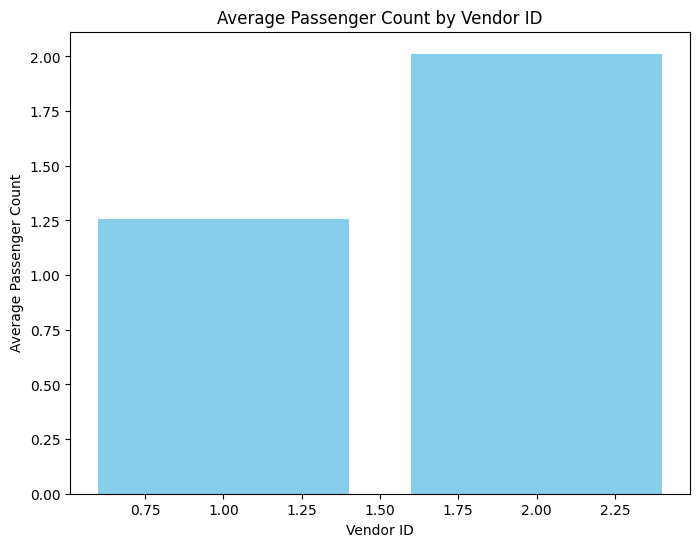

In [17]:
passenger_count_by_vendor = data.groupby('vendor_id')['passenger_count'].mean()
plt.figure(figsize=(8, 6))
plt.bar(passenger_count_by_vendor.index, passenger_count_by_vendor.values, color='skyblue')
plt.xlabel('Vendor ID')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Vendor ID')
plt.show()

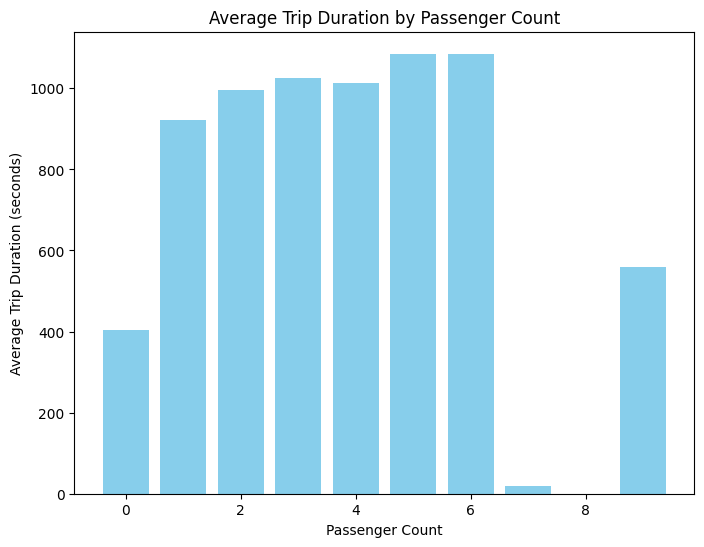

In [18]:
average_duration_by_passenger = data.groupby('passenger_count')['trip_duration'].mean()
plt.figure(figsize=(8, 6))
plt.bar(average_duration_by_passenger.index, average_duration_by_passenger.values, color='skyblue')
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Duration (seconds)')
plt.title('Average Trip Duration by Passenger Count')
plt.show()

#### Here we see that as passenger count increases the trip duration increases showing that higher amount of passenger per taxi ride will more likely drive to farther locations

In [19]:
data['pickup_datetime'].min(), data['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))